# Hands On

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv("../00-storage/csv-store/Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


# Pre Processing

address field in out domain exper is a categorical variable! so we know ...

In [3]:
df = df.drop("Address", axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


now normalize out dataset, we told in the previous season that why we do this technoque <br/>

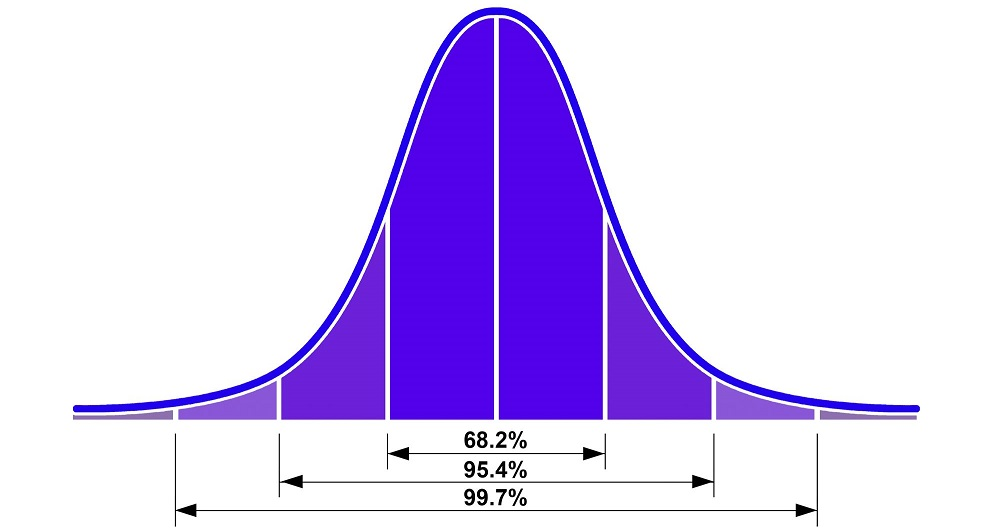

In [4]:
x = df.values[:, 1:]
x

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

cleaning our data before training the model

In [5]:
x = np.nan_to_num(x)
x

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

In [6]:
cluster_dataset = StandardScaler().fit_transform(x)
cluster_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

# Modeling 

In [7]:
clusterNum = 3
k_means = KMeans(init="k-means++", n_clusters=clusterNum, n_init=12)
k_means.fit(x)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

# Insights

In [8]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [9]:
df["Clus_km"] = labels
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [10]:
df.groupby("Clus_km").mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


distribution of customers based on their age and income:

In [11]:
x

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

In [12]:
x[:,1] #=> all of education

array([2., 1., 2., 2., 1., 1., 2., 3., 1., 3., 3., 2., 1., 1., 3., 1., 1.,
       4., 1., 1., 2., 3., 3., 1., 4., 1., 1., 1., 2., 2., 3., 2., 2., 3.,
       1., 2., 3., 1., 1., 3., 1., 3., 2., 5., 1., 3., 1., 1., 1., 2., 1.,
       1., 1., 1., 3., 1., 1., 3., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1.,
       1., 1., 3., 4., 2., 2., 1., 1., 1., 2., 2., 2., 1., 3., 3., 1., 2.,
       1., 4., 2., 2., 4., 2., 2., 1., 1., 3., 2., 1., 1., 2., 3., 1., 4.,
       1., 1., 2., 1., 1., 1., 2., 3., 1., 4., 1., 1., 1., 2., 1., 1., 2.,
       1., 2., 2., 4., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 3., 1., 4.,
       2., 1., 1., 2., 2., 2., 2., 1., 1., 3., 1., 3., 2., 2., 1., 1., 3.,
       1., 2., 1., 1., 1., 2., 3., 1., 3., 2., 1., 2., 4., 3., 1., 1., 4.,
       2., 1., 3., 3., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 3., 2., 1.,
       1., 1., 4., 1., 1., 3., 2., 2., 3., 2., 1., 3., 3., 1., 2., 3., 1.,
       1., 1., 2., 1., 1., 4., 1., 1., 1., 4., 1., 1., 2., 4., 1., 1., 2.,
       3., 2., 4., 1., 1.

In [13]:
area = np.pi * (x[:, 1])**2 #=> π * X1^2 -> Area of a circle
area

array([12.56637061,  3.14159265, 12.56637061, 12.56637061,  3.14159265,
        3.14159265, 12.56637061, 28.27433388,  3.14159265, 28.27433388,
       28.27433388, 12.56637061,  3.14159265,  3.14159265, 28.27433388,
        3.14159265,  3.14159265, 50.26548246,  3.14159265,  3.14159265,
       12.56637061, 28.27433388, 28.27433388,  3.14159265, 50.26548246,
        3.14159265,  3.14159265,  3.14159265, 12.56637061, 12.56637061,
       28.27433388, 12.56637061, 12.56637061, 28.27433388,  3.14159265,
       12.56637061, 28.27433388,  3.14159265,  3.14159265, 28.27433388,
        3.14159265, 28.27433388, 12.56637061, 78.53981634,  3.14159265,
       28.27433388,  3.14159265,  3.14159265,  3.14159265, 12.56637061,
        3.14159265,  3.14159265,  3.14159265,  3.14159265, 28.27433388,
        3.14159265,  3.14159265, 28.27433388,  3.14159265,  3.14159265,
        3.14159265,  3.14159265,  3.14159265, 12.56637061, 12.56637061,
        3.14159265,  3.14159265,  3.14159265,  3.14159265,  3.14

x [:,0]" => all of age , x[:, 3] => all of income

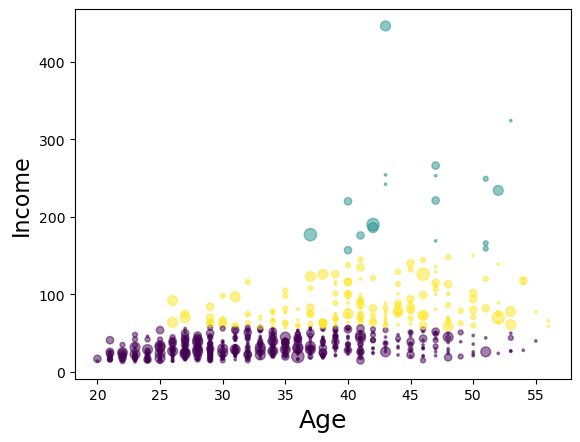

In [14]:
plt.scatter(x[:, 0], x[:,3], s=area,  c=labels.astype(np.float64), alpha=0.5)
plt.xlabel("Age", fontsize=18)
plt.ylabel("Income", fontsize=16)

plt.show()

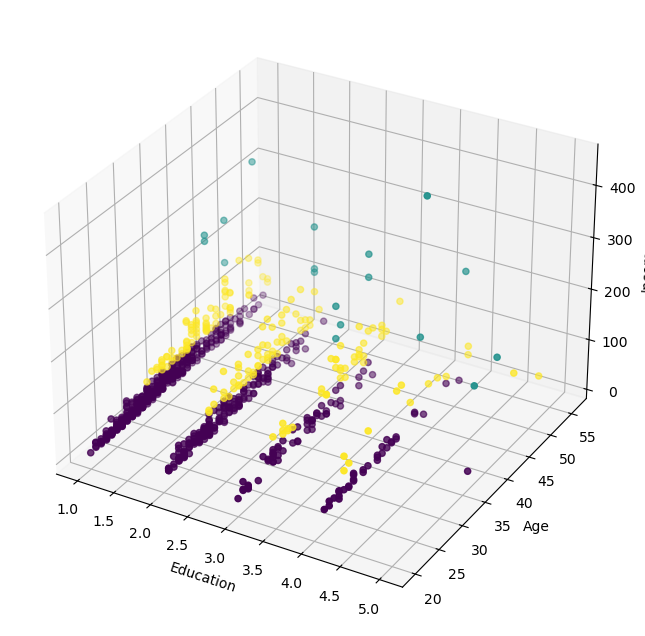

In [15]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d') #=>111 -> n-rows, n-cols, index

ax.scatter(x[:,1], x[:,0], x[:,3], c=labels.astype(np.float64)) #=> x(education) , y(age) , z(income)

ax.set_xlabel("Education")
ax.set_ylabel("Age")
ax.set_zlabel("Income")

plt.show()